In [8]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr, mannwhitneyu, chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------------
# Load data
# ----------------------------------
FILE_PATH = "/content/final_dataset_p90_success.xlsx"

df = pd.read_excel(FILE_PATH)
print("Data shape:", df.shape)

if 'Age' not in df.columns or 'success_label' not in df.columns:
    raise ValueError("Age or success_label column is missing")

# ----------------------------------
# Age groups (only Young vs Peak)
# ----------------------------------
df['Age_Group_Young'] = (df['Age'] <= 20).astype(int)
df['Age_Group_Peak'] = (df['Age'] > 20).astype(int)

print("\nAge groups (first 10 rows):")
print(df[['Age', 'Age_Group_Young', 'Age_Group_Peak']].head(10))

# ----------------------------------
# Correlation with Age
# ----------------------------------
numeric_cols = df.select_dtypes(include=[np.number])
age_corr = numeric_cols.corr()['Age'].sort_values(ascending=False)

print("\nCorrelation of Age with numeric features (top 15):")
print(age_corr.head(15))

print("\nCorrelation of Age with numeric features (bottom 15):")
print(age_corr.tail(15))

# ----------------------------------
# Age vs success_label (point-biserial)
# ----------------------------------
corr_pb, p_pb = pointbiserialr(df['Age'], df['success_label'])
print("\nPoint-biserial correlation (Age vs success_label):")
print("  r =", round(corr_pb, 4))
print("  p-value =", p_pb)

# ----------------------------------
# Age distribution by success group
# ----------------------------------
print("\nAge descriptive stats by success_label:")
print(df.groupby('success_label')['Age'].describe())

age_success = df[df['success_label'] == 1]['Age']
age_fail = df[df['success_label'] == 0]['Age']

u_stat, p_mw = mannwhitneyu(age_success, age_fail, alternative='two-sided')
print("\nMann-Whitney U test (Age between groups):")
print("  U-statistic =", u_stat)
print("  p-value =", p_mw)

# ----------------------------------
# Age group success rates + chi-square
# ----------------------------------
print("\nSuccess rates by age group:")

young_mask = df['Age_Group_Young'] == 1
peak_mask = df['Age_Group_Peak'] == 1

young_rate = df[young_mask]['success_label'].mean() * 100
peak_rate = df[peak_mask]['success_label'].mean() * 100

print(f"  Young (\u226420): N={young_mask.sum()}, success_rate={young_rate:.2f}%")
print(f"  Peak (21\u201323): N={peak_mask.sum()}, success_rate={peak_rate:.2f}%")

df['Age_Group'] = np.where(df['Age'] <= 20, 'Young', 'Peak')

contingency = pd.crosstab(df['Age_Group'], df['success_label'])
chi2, p_chi, dof, expected = chi2_contingency(contingency)

print("\nChi-square test (Age_Group vs success_label):")
print("  chi2 =", chi2)
print("  p-value =", p_chi)
print("  dof =", dof)
print("\nContingency table:")
print(contingency)

# ----------------------------------
# Summary
# ----------------------------------
print("\nSummary:")
print("  Total players:", len(df))
print("  Successful players:", df['success_label'].sum(),
      f"({df['success_label'].mean() * 100:.2f}%)")
print("  Mean Age (success=1):", df[df['success_label'] == 1]['Age'].mean())

Data shape: (43903, 82)

Age groups (first 10 rows):
   Age  Age_Group_Young  Age_Group_Peak
0   22                0               1
1   23                0               1
2   20                1               0
3   23                0               1
4   20                1               0
5   21                0               1
6   23                0               1
7   22                0               1
8   20                1               0
9   20                1               0

Correlation of Age with numeric features (top 15):
Age               1.000000
Age_Group_Peak    0.828768
CA                0.480936
Ant               0.397795
Cnt               0.370178
Str               0.358155
Cmp               0.355431
Weight            0.305165
Vers              0.290601
Pos               0.267239
OtB               0.262773
Sta               0.255728
Tea               0.247181
Bal               0.247103
Pen               0.245575
Name: Age, dtype: float64

Correlation of Age with

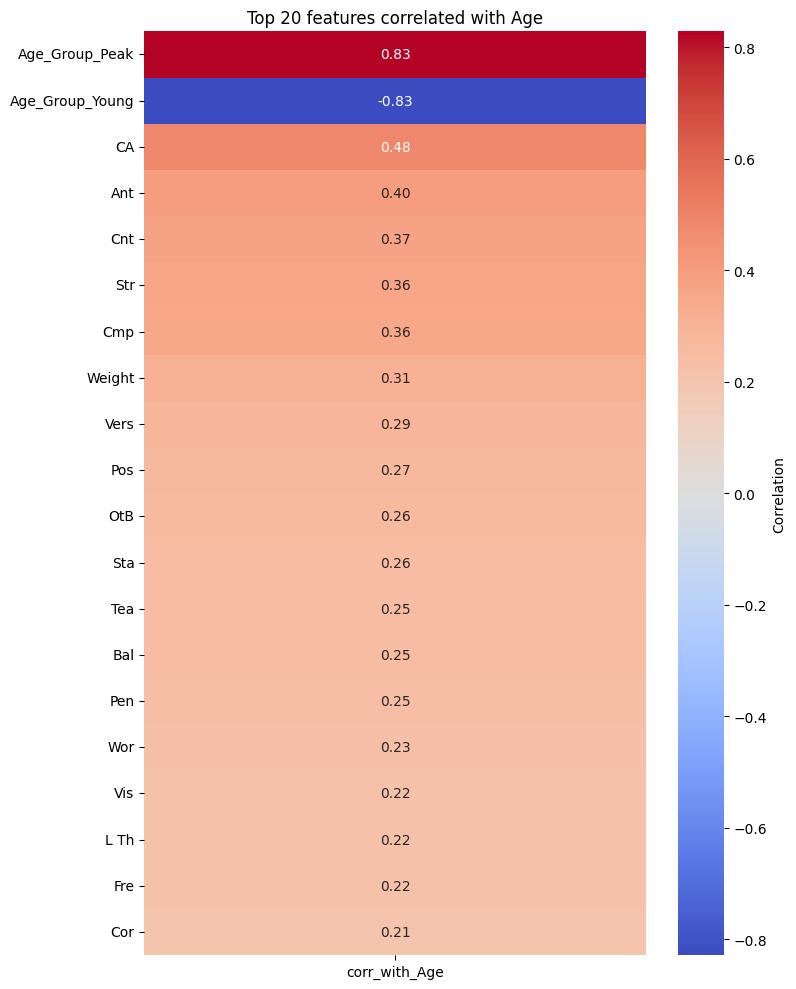

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

# 1) Heatmap: Top 20 features correlated with Age
# Ensure 'age_corr' and 'df' are available from previous execution
if 'age_corr' not in globals():
    numeric_cols = df.select_dtypes(include=[np.number])
    age_corr = numeric_cols.corr()['Age'].sort_values(ascending=False)

top_corr = age_corr.drop('Age').abs().nlargest(20)
top_features = age_corr[top_corr.index].to_frame(name='corr_with_Age')

plt.figure(figsize=(8, 10))
sns.heatmap(
    top_features,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    cbar_kws={'label': 'Correlation'}
)
plt.title("Top 20 features correlated with Age", fontsize=12)
plt.tight_layout()
plt.show()

<Figure size 700x600 with 0 Axes>

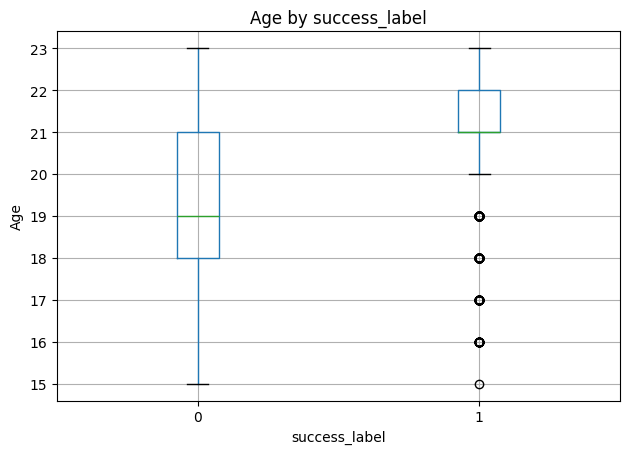

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

# 2) Boxplot: Age by success_label
plt.figure(figsize=(7, 6))
df.boxplot(column='Age', by='success_label')
plt.title("Age by success_label")
plt.xlabel("success_label")
plt.ylabel("Age")
plt.suptitle("") 
plt.tight_layout()
plt.show()

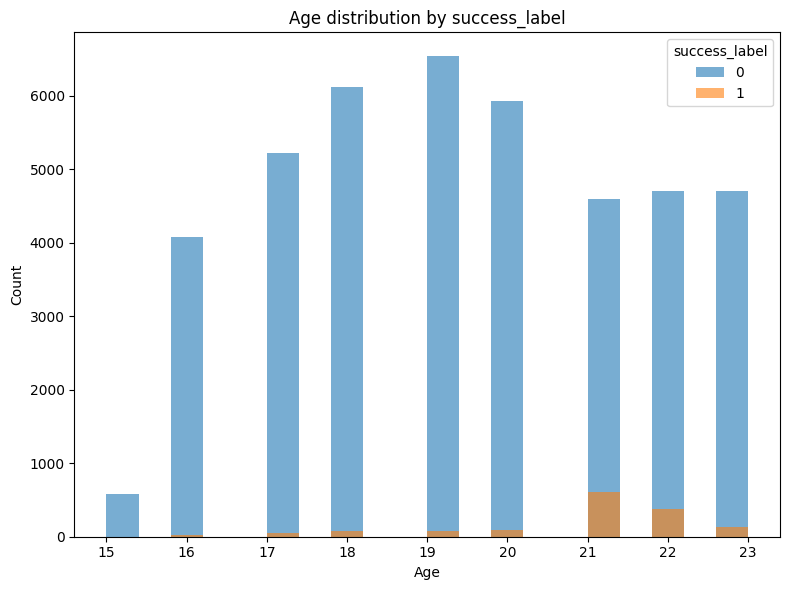

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

# 3) Histogram: Age distribution by success_label
plt.figure(figsize=(8, 6))
plt.hist(df[df['success_label'] == 0]['Age'], bins=20, alpha=0.6, label='0')
plt.hist(df[df['success_label'] == 1]['Age'], bins=20, alpha=0.6, label='1')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age distribution by success_label")
plt.legend(title="success_label")
plt.tight_layout()
plt.show()

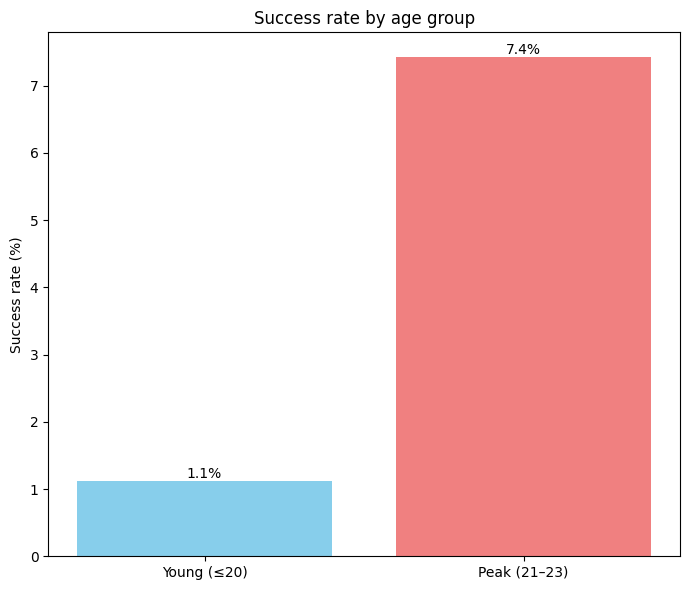

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

# 4) Barplot: Success rate by age group
if 'young_rate' not in globals() or 'peak_rate' not in globals():
    young_mask = df['Age_Group_Young'] == 1
    peak_mask = df['Age_Group_Peak'] == 1
    young_rate = df[young_mask]['success_label'].mean() * 100
    peak_rate = df[peak_mask]['success_label'].mean() * 100

labels = ['Young (\u226420)', 'Peak (21\u201323)']
rates = [young_rate, peak_rate]

plt.figure(figsize=(7, 6))
bars = plt.bar(labels, rates, color=['skyblue', 'lightcoral'])
plt.ylabel("Success rate (%)")
plt.title("Success rate by age group")

for bar, val in zip(bars, rates):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f"{val:.1f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()